In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car_data = pd.read_csv('/Users/ankit/Downloads/CAR DETAILS.csv')

In [4]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
car_data.shape

(4340, 8)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
car_data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
#checking a duplicate rows
total_duplicates = car_data.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")


Total duplicate rows: 763


In [10]:
#droping the duplicates
car_data.drop_duplicates(inplace = True)

In [11]:
car_data.shape

(3577, 8)

In [12]:
car_data.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [13]:
# Create a new feature: Car Age
car_data['car_age'] = 2024 - car_data['year']
car_data.drop(columns=['year'], inplace=True)  # Drop 'year' after creating 'car_age'

In [14]:
# Create Average km per year
car_data['avg_km_per_year'] = car_data['km_driven'] / car_data['car_age']

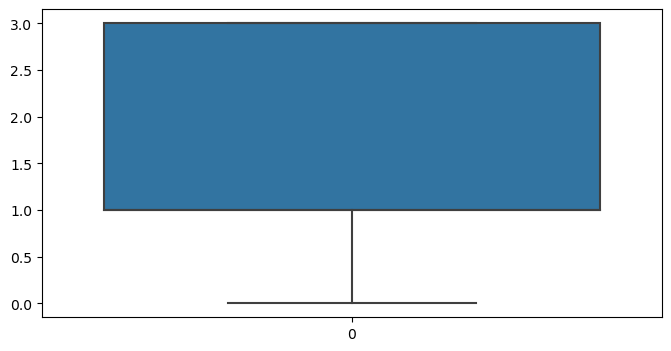

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_data['fuel'])
plt.show()


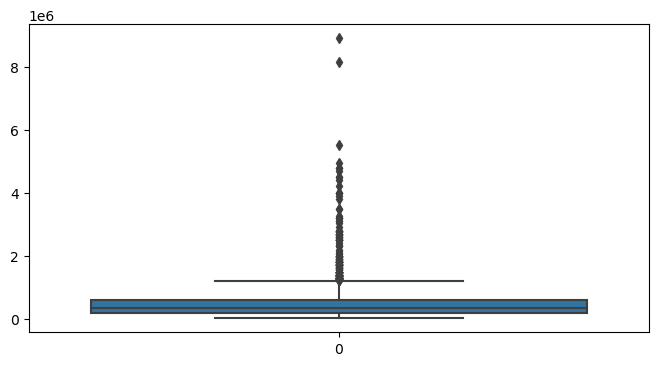

In [16]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_data['selling_price'])
plt.show()

In [17]:
car_data['selling_price'].nlargest(3)

3872    8900000
89      8150000
3969    5500000
Name: selling_price, dtype: int64

In [18]:
car_data = car_data[car_data['selling_price']<6e6].reset_index(drop=True)
car_data['selling_price_log'] = np.log1p(car_data['selling_price'])

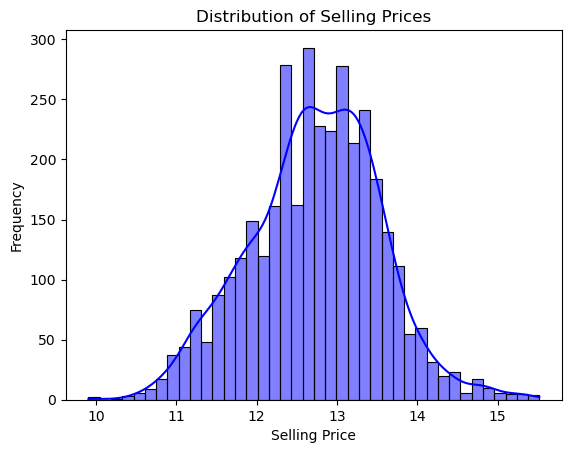

In [19]:
sns.histplot(car_data['selling_price_log'], kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = car_data['selling_price'].quantile(0.25)
Q3 = car_data['selling_price'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
df_no_outliers = car_data[(car_data['selling_price'] >= lower_bound) & (car_data['selling_price'] <= upper_bound)]

print(f"Original Dataset Size: {len(car_data)}")
print(f"Dataset Size After Removing Outliers: {len(df_no_outliers)}")


Original Dataset Size: 3575
Dataset Size After Removing Outliers: 3407


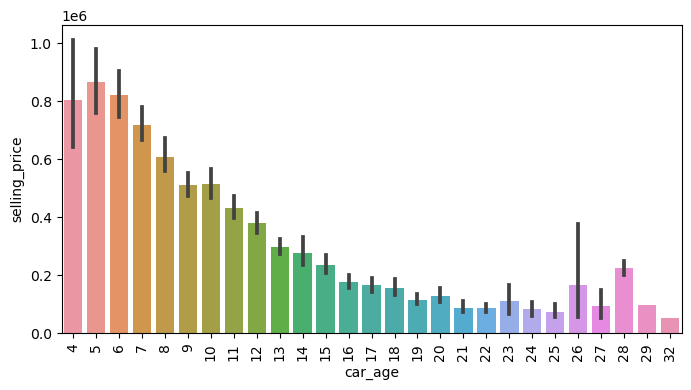

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(data=car_data,x='car_age',y='selling_price')
plt.xlabel('car_age')
plt.ylabel('selling_price')
plt.xticks(rotation=90)
plt.show()

In [22]:
car_data['fuel'].value_counts()
#removing electric column
car_data = car_data[car_data['fuel']!='Electric'].reset_index(drop=True)

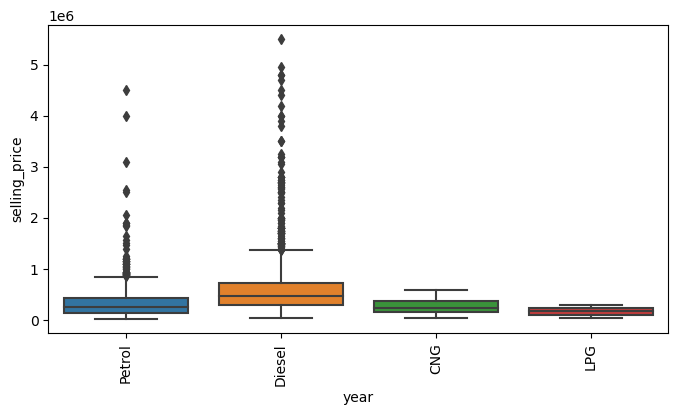

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_data,x='fuel',y='selling_price')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.xticks(rotation=90)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
car_data['fuel'] = lb.fit_transform(car_data['fuel'])
car_data['seller_type'] = lb.fit_transform(car_data['seller_type'])
car_data['transmission'] = lb.fit_transform(car_data['transmission'])
car_data['owner'] = lb.fit_transform(car_data['owner'])
car_data['name'] = lb.fit_transform(car_data['name'])

In [25]:
car_data.reset_index(drop=True)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,avg_km_per_year,selling_price_log
0,774,60000,70000,3,1,1,0,17,4117.647059,11.002117
1,1040,135000,50000,3,1,1,0,17,2941.176471,11.813037
2,504,600000,100000,1,1,1,0,12,8333.333333,13.304687
3,117,250000,46000,3,1,1,0,7,6571.428571,12.429220
4,278,450000,141000,1,1,1,2,10,14100.000000,13.017005
...,...,...,...,...,...,...,...,...,...,...
3569,601,409999,80000,1,1,1,2,10,8000.000000,12.923912
3570,600,409999,80000,1,1,1,2,10,8000.000000,12.923912
3571,776,110000,83000,3,1,1,2,15,5533.333333,11.608245
3572,380,865000,90000,1,1,1,0,8,11250.000000,13.670486


In [26]:
car_data = car_data[car_data['selling_price']<6e6].reset_index(drop=True)

In [27]:
#Check correlation with log-transformed selling price
correlation = car_data.corr()
print("Correlation with Selling Price (Log):\n", correlation['selling_price_log'])


Correlation with Selling Price (Log):
 name                -0.054436
selling_price        0.814353
km_driven           -0.227370
fuel                -0.359485
seller_type         -0.191107
transmission        -0.360789
owner               -0.323026
car_age             -0.700300
avg_km_per_year      0.085350
selling_price_log    1.000000
Name: selling_price_log, dtype: float64


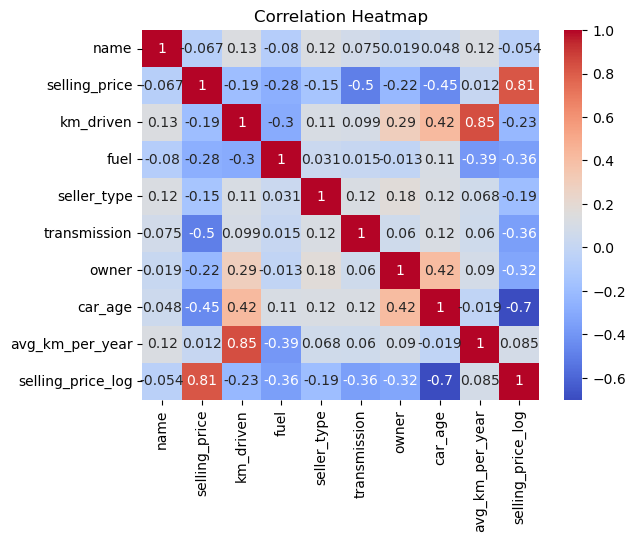

In [28]:
# Heatmap for correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

5. Model Building

In [29]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = car_data.drop(columns=['selling_price', 'selling_price_log'])
y = car_data['selling_price_log']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit((X_train), y_train)
y_pred_gbr = gbr.predict((X_test))

# Evaluate
print("Gradient Boosting R2:", r2_score(y_test, y_pred_gbr))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

# Evaluate Random Forest Regressor
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression R2: 0.643067568265441
Linear Regression RMSE: 0.49629487218948287
Gradient Boosting R2: 0.7954444331187777
Gradient Boosting RMSE: 0.3757097228681708
Random Forest R2: 0.8076428211068458
Random Forest RMSE: 0.3643350740174718


In [32]:
random_samples = car_data.sample(n=20, random_state=42)

X_random = random_samples.drop(columns=['selling_price', 'selling_price_log'])
y_random = random_samples['selling_price_log']

X_random_transformed = (X_random)

predictions = rf.predict(X_random_transformed)

# Reverse the log transformation to get the actual selling price predictions
predicted_prices = np.expm1(predictions)  # Apply expm1 to reverse log1p

# Combine the predictions with their corresponding features for easy comparison
random_samples['Predicted Selling Price'] = predicted_prices

# Print the predictions and the actual values for comparison
print(random_samples[['fuel', 'km_driven', 'car_age', 'avg_km_per_year', 'Predicted Selling Price', 'selling_price']])

      fuel  km_driven  car_age  avg_km_per_year  Predicted Selling Price  \
1780     1      80000       10      8000.000000            450661.039719   
2716     1     100000       13      7692.307692            243691.524183   
33       1      50000       10      5000.000000            384781.903048   
478      1     100000       14      7142.857143            213159.894382   
3147     1     120000       11     10909.090909            386300.828257   
3509     1      90000        9     10000.000000            460193.514886   
2470     1      60000        7      8571.428571            727795.709011   
463      1      65000       13      5000.000000            294839.316626   
2013     1      75000        9      8333.333333            710811.471238   
2630     3      40000       10      4000.000000            347842.588713   
1610     1     120000       18      6666.666667             62727.379718   
567      3      29900       12      2491.666667             57220.848610   
2966     3  

In [38]:
import joblib

# Save the best model
joblib.dump(rf, 'best_rf_model.py')
#Load and test the saved model
loaded_model = joblib.load('best_rf_model.py')
print("Loaded Model R2:", loaded_model.score((X_test), y_test))


Loaded Model R2: 0.8076428211068458


In [39]:
model = joblib.load("best_rf_model.py")

In [41]:
import streamlit as st
import pandas as pd  # Example for handling data
import joblib  # Example for loading machine learning models

# Title and description
st.title("Car Price Predictor")
st.write("This app predicts the price of cars based on various features.")

# Load your model
model = joblib.load("best_rf_model.py")

# User inputs
year = st.number_input("Year of Manufacture", min_value=1900, max_value=2024, value=2018)
km_driven = st.number_input("Kilometers Driven", min_value=0, value=25000)
fuel = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG", "LPG", "Electric"])
seller_type = st.selectbox("Seller Type", ["Dealer", "Individual"])
transmission = st.selectbox("Transmission Type", ["Manual", "Automatic"])
owner = st.selectbox("Owner Type", ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"])

# Predict button
if st.button("Predict Selling Price"):
    if pipeline and model:
        # Create DataFrame
        input_data = pd.DataFrame([[year, km_driven, fuel, seller_type, transmission, owner]],
                                  columns=['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner'])

        try:
            # Predict
            prediction = pipeline.predict(input_data)
            st.success(f"Predicted Selling Price: ₹{prediction[0]:,.2f}")
        except Exception as e:
            st.error(f"Error during prediction: {e}")
    else:
        st.error("Files not loaded correctly. Check paths and try again.")


2024-12-02 16:22:45.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-02 16:22:45.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar